# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import math 
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
from sklearn.model_selection import GridSearchCV , learning_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline



# Reading the Data

In [2]:
train = pd.read_csv("train_cleaned.csv")
test = pd.read_csv("test_cleaned.csv")

train_ID = train['House_Id']
test_ID = test['House_Id']


train.drop("House_Id", axis = 1, inplace = True)
test.drop("House_Id", axis = 1, inplace = True)

In [3]:
def read_data():
    train_data = pd.read_csv("train_cleaned.csv")
    
    test_data = pd.read_csv("test_cleaned.csv")
    
    return train_data , test_data



In [4]:
train_data , test_data = read_data()

In [5]:
train_data.head()

,House_Id,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,FirstFlrSF,SecFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [6]:
test_data.head()

,House_Id,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,FirstFlrSF,SecFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.0,1.0,730.0,140,0
1,1,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.0,1.0,312.0,393,36
2,2,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.0,2.0,482.0,212,34
3,3,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.0,2.0,470.0,360,36
4,4,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.0,2.0,506.0,0,82


# Available Features

In [7]:
# Features
print(train_data.columns.values)

['House_Id' 'OverallQual' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea'
 'BsmtFinSF1' 'TotalBsmtSF' 'FirstFlrSF' 'SecFlrSF' 'GrLivArea' 'FullBath'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars' 'GarageArea'
 'WoodDeckSF' 'OpenPorchSF' 'SalePrice']


# Getting to know the data

In [8]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   House_Id      1458 non-null   int64  
 1   OverallQual   1458 non-null   int64  
 2   YearBuilt     1458 non-null   int64  
 3   YearRemodAdd  1458 non-null   int64  
 4   MasVnrArea    1458 non-null   float64
 5   BsmtFinSF1    1458 non-null   int64  
 6   TotalBsmtSF   1458 non-null   int64  
 7   FirstFlrSF    1458 non-null   int64  
 8   SecFlrSF      1458 non-null   int64  
 9   GrLivArea     1458 non-null   int64  
 10  FullBath      1458 non-null   int64  
 11  TotRmsAbvGrd  1458 non-null   int64  
 12  Fireplaces    1458 non-null   int64  
 13  GarageYrBlt   1458 non-null   float64
 14  GarageCars    1458 non-null   int64  
 15  GarageArea    1458 non-null   int64  
 16  WoodDeckSF    1458 non-null   int64  
 17  OpenPorchSF   1458 non-null   int64  
 18  SalePrice     1458 non-null 

In [9]:
# The shape of the data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1458, 19)
Test data shape: (1459, 18)


In [10]:
# Sale price feature
train_data['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Visualization of number of homes by SalePrice

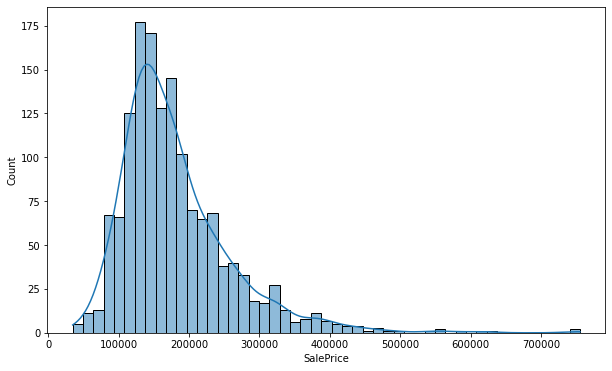

In [11]:
plt.figure(figsize= (10 , 6))
g = sns.histplot(train_data.SalePrice , kde = True)

In [12]:
print('SalePrice Skewness is = ' , train_data.SalePrice.skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

SalePrice Skewness is =  1.8812964895244009
Kurtosis: 6.523067


<AxesSubplot:>

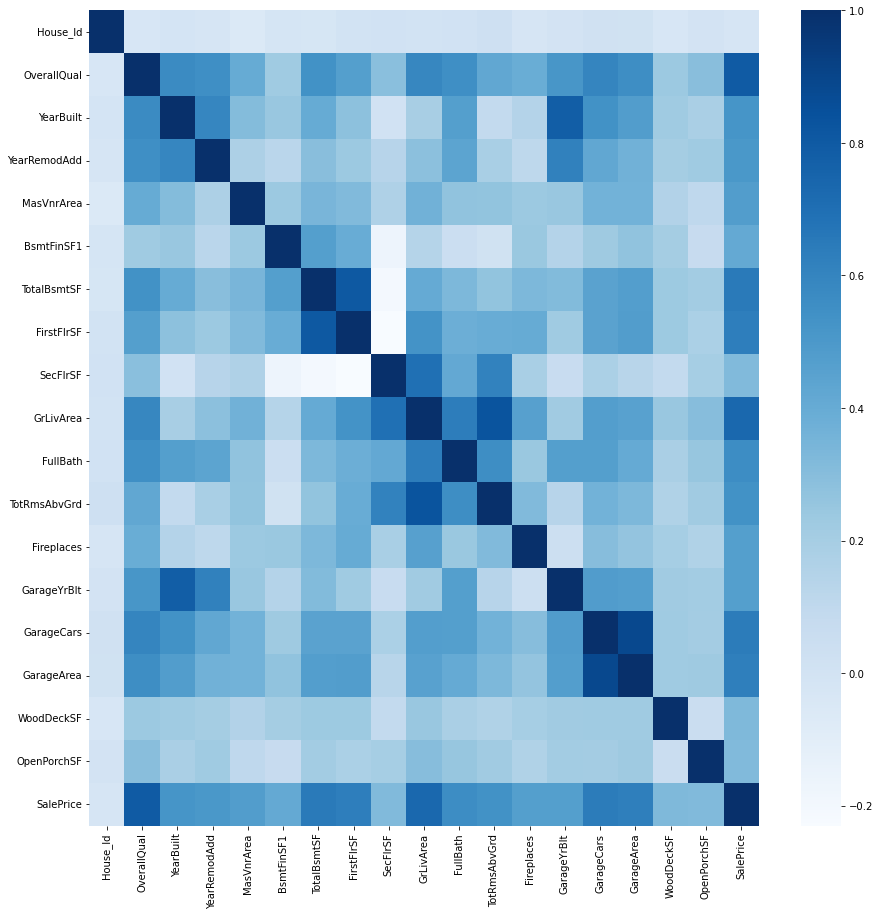

In [13]:
plt.figure(figsize= (15 , 15))
sns.heatmap(train_data.corr(),cmap="Blues")

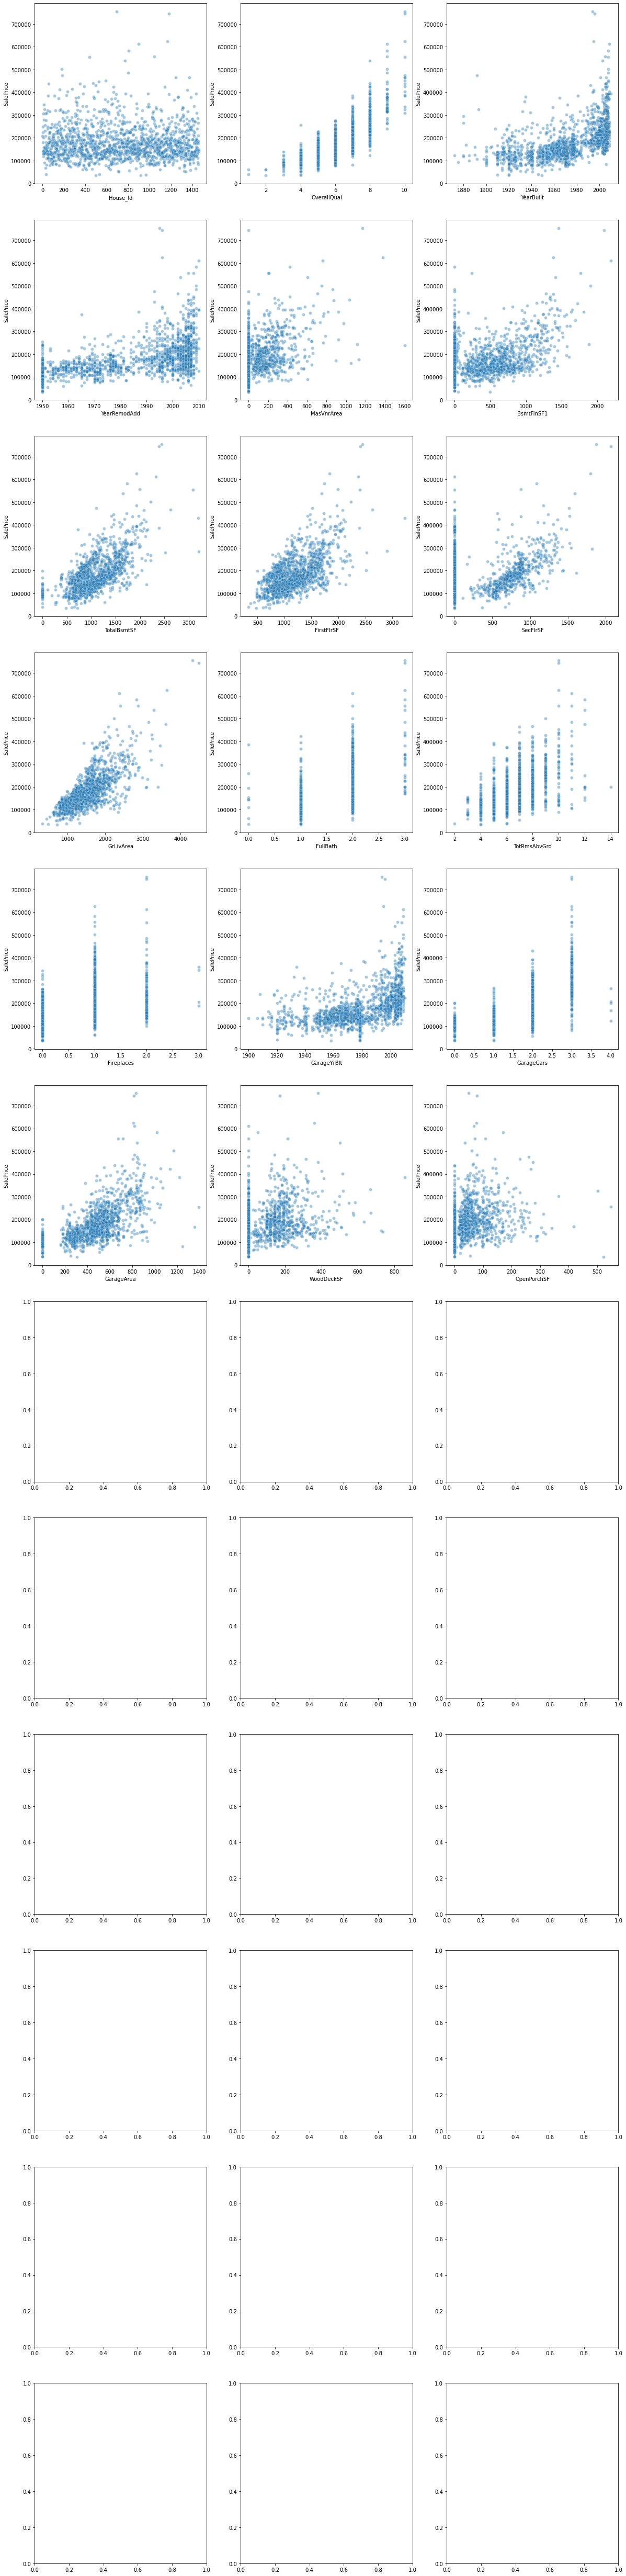

In [14]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = []
for numerical_feature in train_data.columns:
    if train_data[numerical_feature].dtype in numeric_dtypes:
        numerical_features.append(numerical_feature)
        
plot , ax = plt.subplots(12,3 , figsize = (20 , 90))
for index in range(len(numerical_features)-1):
    sns.scatterplot(data = train_data , y = "SalePrice" , x = numerical_features[index] , alpha=0.4 , ax = ax[math.floor(index/3)][index%3])
plt.show()

In [15]:
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)
sale_price = train_data["SalePrice"]
all_data.drop(columns = ["SalePrice"] , inplace = True)
all_data.shape

(2917, 18)

In [16]:
def check_missed_values(all_data):
    all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    return missing_data

In [17]:
missing_data = check_missed_values(all_data)
missing_data.head(35)

,Missing Ratio
BsmtFinSF1,0.034282
TotalBsmtSF,0.034282
GarageCars,0.034282
GarageArea,0.034282


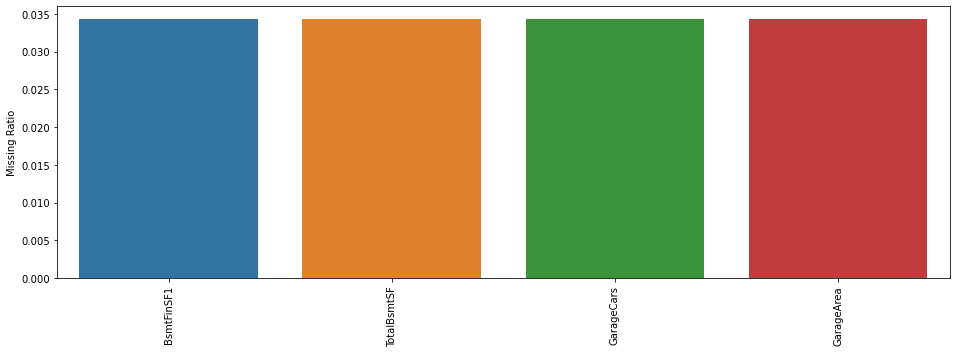

In [18]:
plt.figure(figsize = (16,5))
plt.xticks(rotation='90')
ax = sns.barplot(x = missing_data.index , y = missing_data["Missing Ratio"] )

In [19]:
missing_data = check_missed_values(all_data)
missing_data.head()




,Missing Ratio
BsmtFinSF1,0.034282
TotalBsmtSF,0.034282
GarageCars,0.034282
GarageArea,0.034282


In [20]:
all_data["BsmtFinSF1"] = all_data["BsmtFinSF1"].fillna("None")
all_data["TotalBsmtSF"] = all_data["TotalBsmtSF"].fillna("None")
all_data["GarageCars"] = all_data["GarageCars"].fillna("None")
all_data["GarageArea"] = all_data["GarageArea"].fillna("None")


In [21]:
missing_data = check_missed_values(all_data)
missing_data.head()

,Missing Ratio


In [22]:
#convert non-numeric predictors them into strings 
train_data['SalePrice'] = train_data['SalePrice'].astype(str)
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)

In [23]:
train_data = all_data[:len(train_data)]
train_data["SalePrice"] = sale_price
test_data = all_data[len(train_data):]

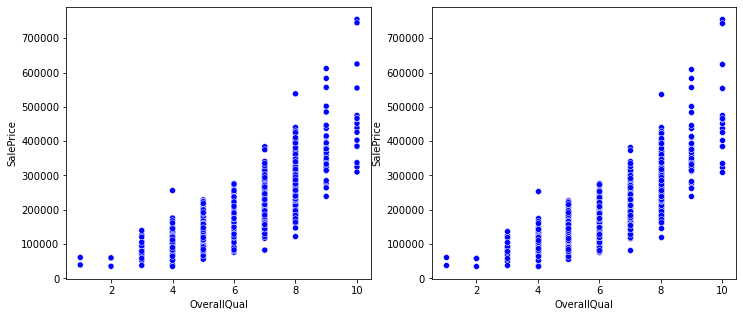

In [24]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train_data["OverallQual"] == 10) & (train_data["SalePrice"] <= 250000)
sns.scatterplot(data = train_data ,x = "OverallQual", y = "SalePrice", c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,ax = ax[0])
train_data.drop(train_data[(train_data["OverallQual"] == 10) & (train_data["SalePrice"] <=250000)].index , inplace = True)
sns.scatterplot(data = train_data ,x = "OverallQual", y = "SalePrice", ax = ax[1] , c = ["blue"])
plt.show()

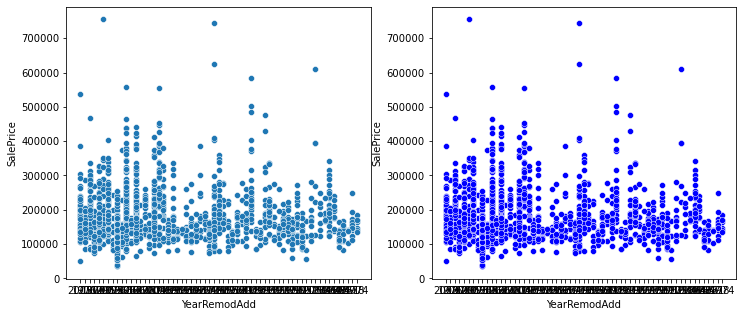

In [25]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
sns.scatterplot(data = train_data ,x = "YearRemodAdd", y = "SalePrice" ,ax = ax[0])
sns.scatterplot(data = train_data ,x = "YearRemodAdd", y = "SalePrice", ax = ax[1] , c = ["blue"])
plt.show()

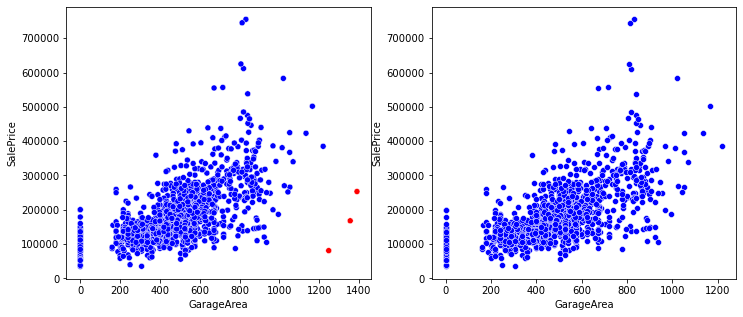

In [26]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train_data["GarageArea"] > 1200 ) & (train_data["SalePrice"] <= 300000)
sns.scatterplot(data = train_data ,x = "GarageArea", y = "SalePrice" , c = ["red" if is_outlier else "blue" for is_outlier in outliers],ax = ax[0])
train_data.drop(train_data[(train_data["GarageArea"] > 1200 ) & (train_data["SalePrice"] <= 300000)].index , inplace = True)
sns.scatterplot(data = train_data ,x = "GarageArea", y = "SalePrice", ax = ax[1] , c = ["blue"])
plt.show()


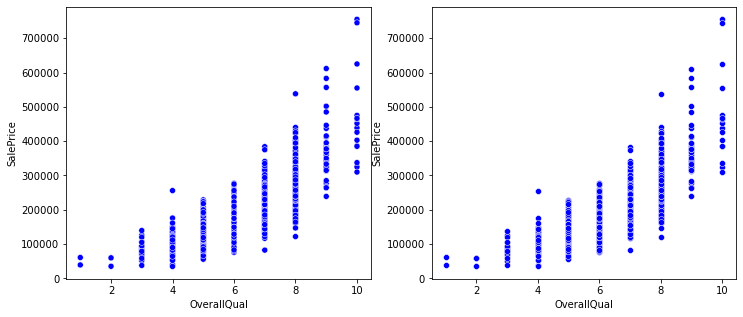

In [27]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train_data["OverallQual"] == 10) & (train_data["SalePrice"] <= 250000)
sns.scatterplot(data = train_data ,x = "OverallQual", y = "SalePrice", c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,ax = ax[0])
train_data.drop(train_data[(train_data["OverallQual"] == 10) & (train_data["SalePrice"] <=250000)].index , inplace = True)
sns.scatterplot(data = train_data ,x = "OverallQual", y = "SalePrice", ax = ax[1] , c = ["blue"])
plt.show()

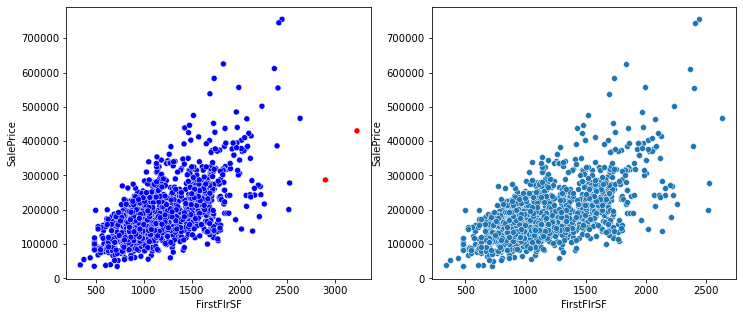

In [28]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train_data["FirstFlrSF"] > 2700)
sns.scatterplot(data = train_data ,x = "FirstFlrSF", y = "SalePrice" ,c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,  ax = ax[0])
train_data.drop(train_data[outliers].index , inplace = True)
sns.scatterplot(data = train_data ,x = "FirstFlrSF", y = "SalePrice", ax = ax[1])
plt.show()

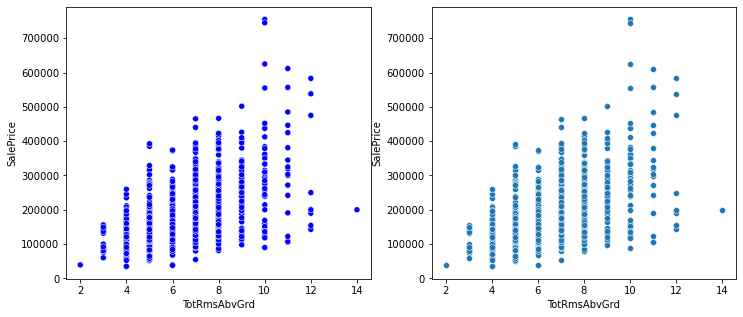

In [29]:
plot , ax = plt.subplots(1 , 2 , figsize = (12 , 5))
outliers = (train_data["TotRmsAbvGrd"] >= 100000)
sns.scatterplot(data = train_data ,x = "TotRmsAbvGrd", y = "SalePrice" ,  c = ["red" if is_outlier else "blue" for is_outlier in outliers] ,ax = ax[0])
train_data.drop(train_data[ (train_data["TotRmsAbvGrd"] >= 100000)].index , inplace = True)
sns.scatterplot(data = train_data ,x = "TotRmsAbvGrd", y = "SalePrice", ax = ax[1])
plt.show()

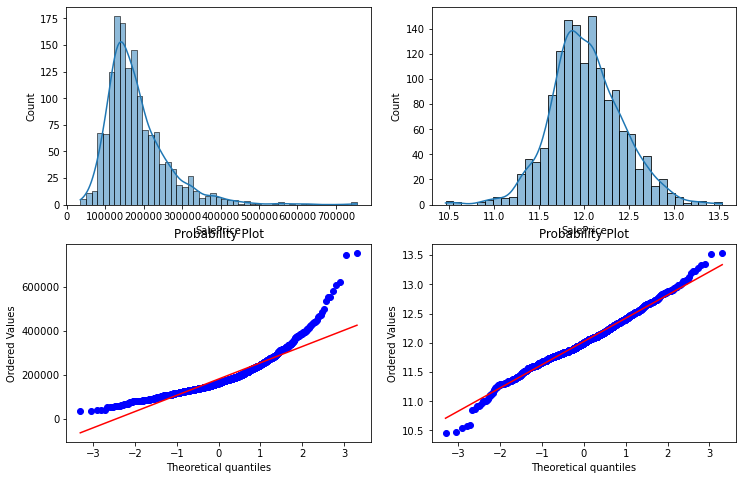

In [30]:
plot , ax = plt.subplots(2 , 2 , figsize = (12 , 8))
g = sns.histplot(sale_price , kde = True , ax = ax[0][0])
res = stats.probplot(sale_price, plot= ax[1][0])
sale_price = np.log1p(train_data["SalePrice"])
g = sns.histplot(sale_price , kde = True , ax = ax[0][1])
res = stats.probplot(sale_price, plot= ax[1][1])

In [31]:
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)
all_data.drop(columns = ["SalePrice"] , inplace = True)
all_data.shape

(2912, 18)

In [32]:
all_data.head()

,House_Id,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,FirstFlrSF,SecFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,0,7,2003,2003,196.0,706.0,856.0,856,854,1710,2,8,0,2003.0,2.0,548.0,0,61
1,1,6,1976,1976,0.0,978.0,1262.0,1262,0,1262,2,6,1,1976.0,2.0,460.0,298,0
2,2,7,2001,2002,162.0,486.0,920.0,920,866,1786,2,6,1,2001.0,2.0,608.0,0,42
3,3,7,1915,1970,0.0,216.0,756.0,961,756,1717,1,7,1,1998.0,3.0,642.0,0,35
4,4,8,2000,2000,350.0,655.0,1145.0,1145,1053,2198,2,9,1,2000.0,3.0,836.0,192,84


In [33]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MasVnrArea,2.620054
OpenPorchSF,2.529304
WoodDeckSF,1.848084
FirstFlrSF,1.214787
GrLivArea,1.064911
SecFlrSF,0.858972
TotRmsAbvGrd,0.750406
Fireplaces,0.727123
OverallQual,0.193240
FullBath,0.162812


# number of skewed numerical features 

In [34]:
skewness = skewness[abs(skewness) > 0.75]
print (skewness.shape[0])

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

12


In [35]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)
all_data.shape

(2912, 2839)

In [36]:
all_data.head()

House_Id  OverallQual  MasVnrArea  FirstFlrSF   SecFlrSF  GrLivArea  \
0  0.000000     2.440268    8.059126   11.692623  11.686189  13.698888   
1  0.730463     2.259674    0.000000   12.792276   0.000000  12.792276   
2  1.194318     2.440268    7.646538   11.892039  11.724598  13.832085   
3  1.540963     2.440268    0.000000   12.013683  11.354094  13.711364   
4  1.820334     2.602594    9.391827   12.510588  12.271365  14.480029   

   FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  WoodDeckSF  OpenPorchSF  \
0  1.194318      2.602594    0.000000    14.187527    0.000000     5.714669   
1  1.194318      2.259674    0.730463    14.145138    9.010206     0.000000   
2  1.194318      2.259674    0.730463    14.184404    0.000000     5.053371   
3  0.730463      2.440268    0.730463    14.179714    0.000000     4.745132   
4  1.194318      2.750250    0.730463    14.182841    8.013884     6.314735   

   YearBuilt_1872  YearBuilt_1875  YearBuilt_1879  YearBuilt_1880  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   YearBuilt_1882  YearBuilt_1885  YearBuilt_1890  YearBuilt_1892  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   YearBuilt_1893  YearBuilt_1895  YearBuilt_1896  YearBuilt_1898  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   YearBuilt_1900  YearBuilt_1901  YearBuilt_1902  YearBuilt_1904  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   YearBuilt_1905  YearBuilt_1906  YearBuilt_1907  YearBuilt_1908  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   YearBuilt_1910  YearBuilt_1911  YearBuilt_1912  YearBuilt_1913  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   YearBuilt_1914  YearBuilt_1915  YearBuilt_1916  YearBuilt_1917  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               1               0               0   
4               0               0               0               0   

   YearBuilt_1918  YearBuilt_1919  YearBuilt_1920  YearBuilt_1921  \
0               0               0               0               0   
1               0               0       

In [37]:
train_data = all_data[:len(train_data)]
test_data = all_data[len(train_data):]

In [38]:
target = sale_price
train = train_data

In [39]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)
scores = {}

In [40]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=train , Y=target):
    rmse = np.sqrt(-cross_val_score(model,X, Y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [41]:
decision_tree_model = DecisionTreeRegressor()
score = cv_rmse(decision_tree_model)
print("Decision Tree Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Decision Tree Model: 0.2124 (0.0185)


In [42]:
clf = GridSearchCV(decision_tree_model , {
    "max_depth" : [6,7,8,9,10,11,12],
    "min_samples_split": [6,7,8,9,10],
    "min_samples_leaf" : [5,7,8,9,10]
},verbose = 1)
clf.fit(train , target)
clf.best_estimator_

Fitting 5 folds for each of 175 candidates, totalling 875 fits


DecisionTreeRegressor(max_depth=10, min_samples_leaf=9, min_samples_split=9)

In [43]:
score = cv_rmse(clf.best_estimator_)
print("Decision Tree Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['decision_tree'] = (score.mean(), score.std())

Decision Tree Model: 0.1873 (0.0182)


In [44]:
# Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
score = cv_rmse(random_forest_model)
print("Random Forest Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['random_forest'] = (score.mean(), score.std())

Random Forest Model: 0.1577 (0.0163)


In [45]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='huber',random_state=42)  
score = cv_rmse(gbr)
print("gradient_boosting: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gradient boosting'] = (score.mean(), score.std())

gradient_boosting: 0.1481 (0.0149)


In [46]:
# XGBoost Regressor
xgboost = XGBRegressor(objective='reg:squarederror',random_state=42)
score = cv_rmse(xgboost)
print("xgboost_model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Xgboost'] = (score.mean(), score.std())

xgboost_model: 0.1569 (0.0147)


In [47]:
 #Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
score = cv_rmse(svr)
print("Support Vector Machine: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Support Vector Machine'] = (score.mean(), score.std())

Support Vector Machine: 0.1472 (0.0153)


In [48]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', verbose=1,random_state=42)
score = cv_rmse(lightgbm)
print("Light Gbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['Lgbm'] = (score.mean(), score.std())

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1699
[LightGBM] [Info] Number of data points in the train set: 1331, number of used features: 66
[LightGBM] [Info] Start training from score 12.027516
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1691
[LightGBM] [Info] Number of data points in the train set: 1332, number of used features: 68
[LightGBM] [Info] Start training from score 12.023360
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info]

In [49]:
decision_tree_model_full_data = decision_tree_model.fit(train , target)
random_forest_model_full_data = random_forest_model.fit(train , target)
gbr_full_data = gbr.fit(train , target)
xgboost_full_data = xgboost.fit(train , target)

svr_full_data = svr.fit(train , target)
lightgbm_full_data = lightgbm.fit(train , target)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1762
[LightGBM] [Info] Number of data points in the train set: 1453, number of used features: 75
[LightGBM] [Info] Start training from score 12.023193


In [50]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.1 * random_forest_model_full_data.predict(X)) + \
            (0.2 * gbr_full_data.predict(X)) + \
            (0.1 * xgboost_full_data.predict(X)) + \
            
            (0.1 * lightgbm_full_data.predict(X)) + \
            (0.3 * svr_full_data.predict(X)))

In [51]:
# Get final precitions from the blended model
blended_score = rmsle(target, blended_predictions(train))
scores['blended'] = (blended_score, 0)

print(blended_score)

2.404105415872522


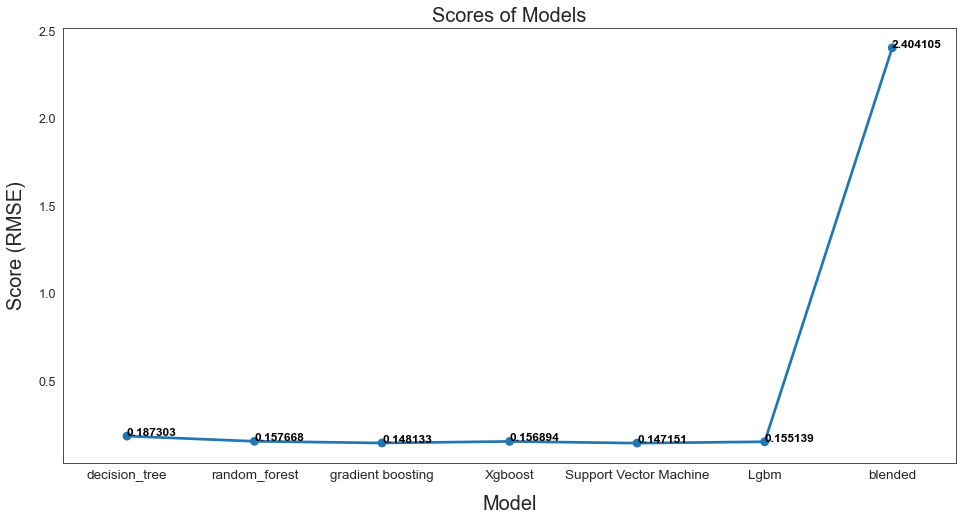

In [52]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(16, 8))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()